In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
currency_data = pd.read_csv("banknote_authentication.csv", header = None)

In [3]:
currency_data.columns = ['Var', 'Skew', 'Curt', 'Entr', 'Auth']

In [4]:
currency_data.head()

,Var,Skew,Curt,Entr,Auth
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
currency_data.isnull().sum()

Var     0
Skew    0
Curt    0
Entr    0
Auth    0
dtype: int64

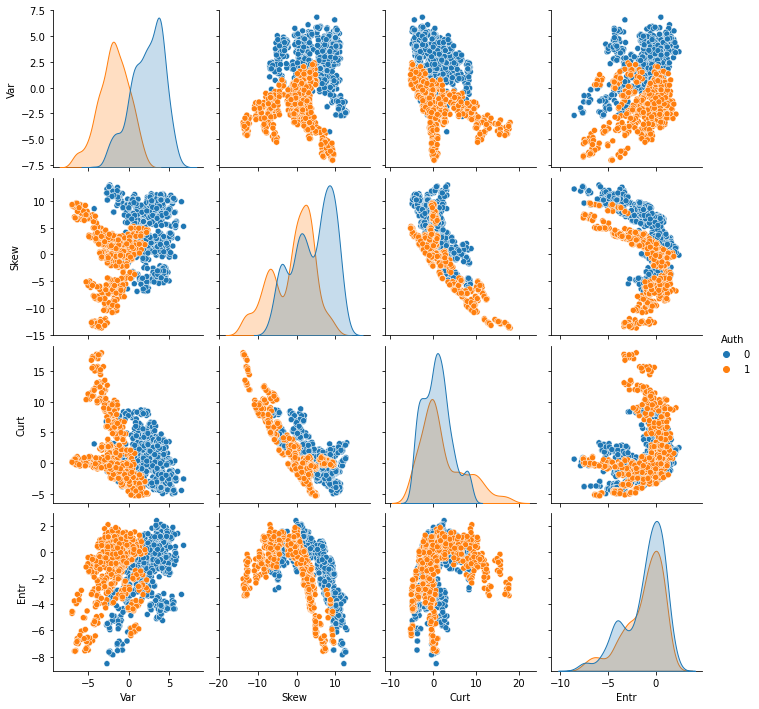

In [6]:
sns.pairplot(currency_data, hue='Auth')
plt.show()

<AxesSubplot:xlabel='Auth', ylabel='count'>

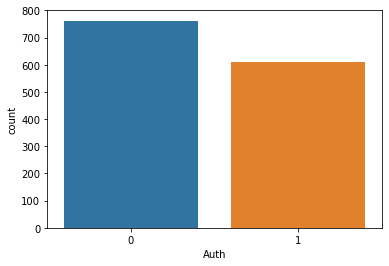

In [7]:
sns.countplot(x=currency_data['Auth'])


In [8]:
currency_data.columns

Index(['Var', 'Skew', 'Curt', 'Entr', 'Auth'], dtype='object')

In [9]:
X = currency_data.iloc[:,0:4]

In [10]:
X

,Var,Skew,Curt,Entr
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [11]:
y = currency_data.iloc[:,-1]

In [12]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Auth, Length: 1372, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [17]:
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [18]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [19]:
print(classifier.predict(ss.transform([[6.563300,9.81870,-4.411300,-3.225800]])))

[0]
